# Project - Applying K-means Clustering to the FIFA dataset values

## What is K-means Clustering?

### K-means is an unsupervised machine learning technique that allow us to cluster data points. It help in finding patterns in the data. It is an iterative algorithm, and it converge to optimal clustering over time. In K-means clustering we are not predicting any values, instead we are giving it some data points values and it is going to find some patterns from those values. 

## How K-means Clustering Works?

### Step-1: Define numbers of clusters (which is referred by k). By defining clusters, we will specify number of iterations needed to be made.
### Step-2: Initialize the Centroid randomly for each cluster. The centroid is the data point that is in the center of the cluster. The cnetroid just tells us about center of the cluster.
### Step-3: Determine which data points belong to which cluster by finding closest ceentroid to each data point. it helps in finding the values from each cluster.
### Step-4: Update the centroids based on the geometric mean of all data points in the cluster. 
### Step-5: Run Step 3 and Step 4 until the centroids stop changing. Every run is considered as an iteration.

In [1]:
# Step-1: Importing the required libraries and packages

import pandas as pd
import numpy as np

In [35]:
from IPython.core.display import HTML

css = """
<style>

h1 {
    color: red;
}

h2 {
    color: green;
}

h3, h5, h6 {
    color: #187593;
}

h4 {
    color: #006CA5;
}
</style>
"""

HTML(css)

In [3]:
# Step-2: Loading the data we wantt o use

players = pd.read_csv('D:\Power BI\Projects\k-means clustering\players_22.csv')

C:\Users\arpit\AppData\Local\Temp\ipykernel_140\3205294998.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('D:\Power BI\Projects\k-means clustering\players_22.csv')


In [4]:
# Step-3: Displaying the data to verify it

players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [5]:
# Step-4: Defining the features we need to use in the clustering

features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']

In [6]:
# Step-5: Dropping the null values from the features columns we want to use using subset method (This is important step for 
# clustering, as most of the clusters don't work with null values)

players = players.dropna(subset=features)

In [7]:
# Step-6: Copying the data into a new dataframe to perform clustering

data = players[features].copy()

In [8]:
# Step-7: Displaying the data copied from the dataset from the features values

data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


## Overview - Steps to be Performed for the k-means clustering

### Step-1: Scale the Data - Here, we want the data to go from a certain value to a certain value. This is because of large difference in the values of the players and the clustering will prepare more to higher values. To consider values, from smaller to larger we need to scale the data. We will range all the values on a scale of 1 to 10 to avoid domination of any of the columns with high values in the clustering.
### Step-2: Initilaize Random Centroids - After rescaling the data, we will assign thee centroids for each data points as per k-means clustering process.
### Step-3: Label Each Data Point - After creating the centroids, we will create data points based on how far it is from each centroids. It will give the cluster assignment for each player. Each data point is one row in our data.
### Step-4: Update our Centroids - We will look at each player and their label and then we will find the center point of each cluster.
### Step-5: Repeat Steps 3 and 4 until centroids stop changing.

## Step-1:  Scale the Data

In [9]:
# Using min/max, subtracting minimum value in each column value and sets the minimum value of each column to zero. Then we will
# divide the range of data to rescale every value in the range of 0 to 1. After this, multiply the value by 9 to rescale 
# everything from 0 to 9 and add 1. In this, we need minimum value of 0 and negative values don't work. 

data = data.apply(pd.to_numeric, errors='coerce')
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [10]:
# Checking the values for the data columns to be minimum as 1 and maximum as 10. This shows that all columns are on same scale
# and no column will dominate the values. 

data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
# Printing some rows of the head to see the rescaled values

data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


## Step-2: Initialize the Random Centroids

In [12]:
# Iterating through all the columns in the data using lambda. Sample selects the random single value from a column. We will be 
# using random single value from each column and turn it into a float as it will return a pandas series and we want a single 
# number. 

centroid = data.apply(lambda x: float(x.sample()))

In [13]:
# Displaying the centroid and the values obtained from it. It will return a pandas series with random values.

centroid

overall      4.130435
potential    7.847826
value_eur    1.026259
wage_eur     1.270386
age          2.333333
dtype: float64

In [14]:
# Now we will create a function to get number of centroid we need as per our k value. (Assume we have k=5, we need 5 centroids).
# We will create a list containing centroids and a for loop with k value and inside that we will create our centroids and append 
# it in the list of centroids.
# here, number of centroids will be equal to number of clusters needed.
# At last, we will concat all the centroids using concat and axis as concat will combine all the individual centroids or pandas 
# series into a dataframe.

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid) # Combining all the centroids
    return pd.concat(centroids, axis=1)

In [15]:
# Printing the centroids required using above function. (here, we are assume k-5, we will generate 5 centroids).

centroids = random_centroids(data, 5)
centroids

# In the output, each column is a centroid and each row is a different feature. The values inside one cluster will look like - 
# Cluster 1 : {overall-5.108696; potential-6.673913; value_eur-1.166601; wage_eur-1.009013, age-5.000000} and so on...

,0,1,2,3,4
overall,6.086957,4.326087,6.086957,5.304348,4.326087
potential,4.717391,4.521739,5.695652,3.739130,6.086957
value_eur,1.069173,1.203716,2.345006,1.166601,1.029738
wage_eur,1.708155,1.090129,1.038627,1.038627,1.038627
age,2.000000,3.333333,2.333333,4.333333,5.666667


## Step-3: Label Each Data Point

In [16]:
# This function will label each data point according to the cluster centers. This function will look at each player in the data.
# This function will find distance between the data points and euclidean distance (each point and cluster). Then find cluster
# center that is closest to that data point.

# First data point represent Lionel Messi, we will evaluate distance between Lionel Messi overall rating, wage etc. and then we 
# will take the centroid that is closest and assign lionel messi to that cluster.

# To calculate the distance, we will subtract the values for centroid from each of the data point and then we square that and 
# take square rootof the overall result.We will add all the distances before taking the square root.

# Here, We are subtracting from each row (the values for the centroids), let's say we take overall and then subtaract the value
# from cluster 0, similarly we take potential and subtract the value from centroid 0 and then square the difference, adding 
# those together and then taking the square root of it.

# We will apply this formula to all our centroids using apply and lambda. The result will be assigned to the variable distances.

# All this is wrapped into a function called get_labels which parameters - data and centroids.

# Now we will figure out automatically, which cluster player are in and it can be done by using idxmin, and assigning axis to 1.
# this will find the index of the minimum value in each row.The index of the minimum value is also the cluster assignment and it
# will tell us which cluster each player should be in.

# Here, the distances variable output is giving us a number which represents the distance from each player to each cluster 
# centroid. Like, the first row represent first value (the Lionel Messi) to the center of the cluster zero. For Messi, the 
# closest cluster is cluster four (has least distance from it)

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [17]:
# We can call the get_labels function and it will return the labels for each player.

# We will also be able to see how many players are in each clusters. value count will count how many times each unique value 
# occurs in a column. (Like 5915 unique players are in cluster 1).

# Now from this data, we have assigned each player to a cluster based on random centroids.Next, we have to update the centroids
# based on who is in which cluster. We can do this by finding all players in a cluster and take the geometric mean (different 
# from mean) of each feature.

labels = get_labels(data, centroids)
labels.value_counts()

1    8411
4    4343
3    3308
2    3062
0      41
dtype: int64

## Step-4: Update the Centroids

In [18]:
# Mean is when we add all values and divide it with number of values. Whereas, Geometric mean is the mean of center of points in
# euclidean space and it gives the center of each cluster. By finding geometric mean by multiplying each point together and 
# taking the nth root based on the number of points.

# For this, we will modify the geometric mean calculation to avoid large number multiplication. We will use log for this.

# This will take value in each row for a given player , then it will find the mean of all the values in the row and do the 
# exponential to that value and give a result. We will apply this to each of our labels in data. Here, we use groupby(labels)
# will split the data by one group for each cluster and to each of those groups we will apply geometric mean which will
# calculate the new centers for each column.

# The output will be the centroids in each row based on geometric mean.

# This is wrapped in the function - new_centroids

def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

## Step-5: Creating the Loop

In [19]:
# (Not Necessary) Try to visualize the iteration of what exactly is going to happen with the data. we will try to plot the 
# cluster assignment at each step in our algorithm at each iteration.

# Firstly, we will import some libraries and packages.
# PCA - Principal Component Analysis and it will help in visualizing the data since we have 5D data. We will convert this 5D in 
# 2D data to create an easily understandable data. We will graph our clusters using PCA.

# clear_output will help in clearing the notebook and plotting the new visuals.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [22]:
# We will write our function to plot the visuals of the clusters. Here, iteration will just show which iteration in cluster is
# going on.

# We are initializing a PCA model, and we want to return two columns to be returned. The ft_transform runs the model on data. 
# After fitting the data, it will transform the data into a two-dimensional data. we will do the same with centroids also.

# If we have a graph displayed, clear_output will clear it and output the new graph.

# Lastly, we will plot our graph and on top of that we will plot our centroids as well.

# In this function, we are first transforming our data into a 2D data and then plotting our centroid clusters and coloring them.

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    
    plt.show()

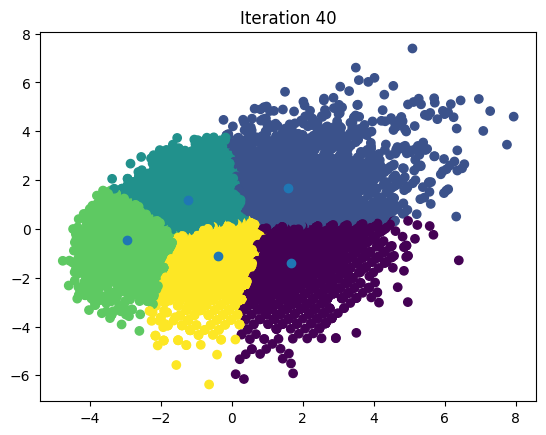

In [33]:
# Writing the body of the k-means clustering

max_iterations = 100 # Total no. of times algorithm will iterate unless cluster stop changing
k = 5 # Total number of clusters

# Preparing the logic

# First, we will initialize the random centroids. And we will initialize the old centroids , and the algorithm will stop when
# the old centroids will equal the current centroids.

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids) # This corresponds to each players goes into which cluster
    centroids = new_centroids(data, labels, k) # Updating the centroids value based on geometric mean
    plot_clusters(data, labels, centroids, iteration) # Plotting the clusters
    iteration += 1

In [34]:
# Interpreting the output of the above clusters iteration result

centroids

,0,1,2,3,4
overall,5.197519,6.426721,4.251987,2.460673,4.178852
potential,4.814245,6.696536,5.975248,4.372612,4.247390
value_eur,1.053833,1.422873,1.062788,1.012916,1.033435
wage_eur,1.162714,1.650159,1.071719,1.015448,1.055896
age,6.129742,4.097054,2.544285,2.299364,4.340380


In [27]:
# Understanding players in each clusters

# Here, Cluster zero has older players who have hit their prime and they are on high salary and value. 

players[labels==0][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
7085,G. Guruceaga,68,73,1400000.0,500.0,26
7116,E. Zaldívar,68,77,2500000.0,5000.0,24
7319,Sori Mané,68,75,2200000.0,5000.0,25
7329,N. Šipčić,68,73,1600000.0,4000.0,26


In [28]:
# Understanding players in each clusters

# Here, Cluster one has younger players with high potential possible  and they are on low salary and value. 

players[labels==1][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
3568,Sebas Couteira,72,72,2800000.0,9000.0,21
3570,Gustavo Lobateiro,72,72,2800000.0,14000.0,21
3574,Teixe Gaúcho,72,72,2400000.0,8000.0,21
3581,Vanderleiton,72,72,2400000.0,12000.0,21
3586,Pimentiscinho,72,72,2500000.0,11000.0,21
...,...,...,...,...,...,...
18100,A. Besio,55,76,400000.0,500.0,17
18124,M. Løvik,55,76,375000.0,500.0,17
18125,J. Hernández,55,77,400000.0,500.0,17
18227,K. Urbański,54,79,350000.0,550.0,16


## BONUS - Comparing with Sklearn KMeans Algorithm

In [31]:
# Importing the required libraries

from sklearn.cluster import KMeans

# Initializing the K-means for sklearn

kmeans = KMeans(5) # defining number of clusters
kmeans.fit(data)

# Creating centroids using kmeans variable

centroids = kmeans.cluster_centers_

# Storing the cluster centroid data into a dataframe 

pd.DataFrame(centroids, columns=features).T

,0,1,2,3,4
overall,5.629577,2.992981,4.192975,4.957822,7.111813
potential,5.268686,4.876076,4.060371,6.121442,7.285913
value_eur,1.083657,1.019558,1.027322,1.098499,1.917636
wage_eur,1.260199,1.021618,1.050128,1.153881,2.293632
age,6.064703,2.427492,4.934340,3.132320,4.387487


#### The above project has mentioned the process of using k-means clusters to find cluster data points. It help in finding patterns  in the data. This algorithm is useful in the analysis of data as well as in the scouting process where we need to find similar players in a category. 

#### This notebook has the code reference along with step-by-step details for the k-means clustering process which can be implemented directly using above code reference.